# Foundations of Computational Economics #17

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Linear regression using Pandas and Numpy

<img src="_static/img/lab.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/LafDXp28IRE](https://youtu.be/LafDXp28IRE)

Description: Using Numpy and Pandas to estimate simple regression.

### Linear regression

Recall the classic linear regression model with data in columns of
$ (X,y) $, where $ X $ are independent variables and $ y $ is
the dependent variable.
Parameter vector to be estimated is $ \beta $, and we assume that
errors follow $ \varepsilon \sim N(0, \sigma) $

$$
y = X \beta + \varepsilon \quad \quad \varepsilon \sim N(0, \sigma)
$$

Let $ \hat{\beta} $ denote the estimate of the parameters $ \beta $.
To find it, we minimize the sum of squares of the residuals
$ e = y - X \hat{\beta} $, i.e. $ e'e \longrightarrow_{\hat{\beta}} \min $,
which leads to the well known OLS formula

$$
\hat{\beta} = (X'X)^{-1} X' y
$$

The mean standard error (MSE) of the regression is calculated as $ s = \sqrt{\frac{1}{n-k} e'e} $,
where $ n $ is the number of observations and $ k $ is the number of parameters (elements in $ \beta $).

The variance-covariance matrix of the estimates is given by $ \hat{\Sigma} = s^2 (X'X)^{-1} $.
The square root of the diagonal elements of this matrix are them standard deviations of the estimates, and give us the measure of the accuracy of the estimated parameters.

[William Greene “Econometric Analysis”](https://books.google.com.au/books?id=LWQuAAAAQBAJ&dq=greene%20econometric%20analysis)

In [4]:
from typing import Any

import numpy as np
from numpy import ndarray, dtype, floating


def ols(X: object, y: object, addConstant: object = True, verbose: object = True) -> object:
    '''Return the OLS estimates and their variance-covariance matrix for the given data X,y
    When addConstant is True, constant is added to X
    When verbose is True, a report is printed
    '''
    beta = np.linalg.inv(X.T @ X ) @ X.T @ y
    e = y - X @ beta 
    n, k = X.shape  #The number of columns in X is the number of beta's and the number of rows is the number of observations
    s2 = e.T @ e /(n-k)
    Sigma = s2 * (np.linalg.inv(X.T @ X))
    return beta, Sigma

In [40]:
# test on small dataset
X = np.array([[5, 3],
              [2, 3],
              [3, 1],
              [2, 8],
              [4.5, 2.5],
              [2.5, 1.5],
              [4.3, 4.2],
              [0.5, 3.5],
              [1, 5],
              [3, 8]])
truebeta = np.array([1.234,-0.345])[:,np.newaxis]  # column vector
y = X @ truebeta + 2.5 + np.random.normal(size=(X.shape[0],1),scale=0.2)
print(X,truebeta,y,sep = '\n \n ')
beta: ndarray[Any, dtype[floating[Any]]] | Any
beta,S=ols(X,y)
beta,S=ols(X,y,addConstant=False)

[[5.  3. ]
 [2.  3. ]
 [3.  1. ]
 [2.  8. ]
 [4.5 2.5]
 [2.5 1.5]
 [4.3 4.2]
 [0.5 3.5]
 [1.  5. ]
 [3.  8. ]]
 
 [[ 1.234]
 [-0.345]]
 
 [[7.85093226]
 [4.27317363]
 [6.01866598]
 [1.8784508 ]
 [7.32912468]
 [4.86778349]
 [5.99657569]
 [1.64335294]
 [2.16387243]
 [3.35924365]]


NameError: name 'ndarray' is not defined

In [6]:
# test with one dimensional arrays
X = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([9.4,8.1,7.7,6.3,5.7,4.4,3.0,2.1,1.1,0.8])

beta,S=ols(X,y)
beta,S=ols(X,y,addConstant=False)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [ ]:
import numpy as np
def ols(X,y,addConstant=True,verbose=True):
    '''Return the OLS estimates and their variance-covariance matrix for the given data X,y
    When addConstant is True, constant is added to X
    When verbose is True, a report is printed
    '''
    y = y.squeeze()  # we are better off if y is one-dimensional
    if addConstant and X.ndim==1:
        X = np.hstack((np.ones(X.shape[0])[:,np.newaxis],X[:,np.newaxis]))
        k = 2
    elif addConstant and X.ndim>1:
        X = np.hstack((np.ones(X.shape[0])[:,np.newaxis],X))
        k = X.shape[1]+1
    elif X.ndim==1:
        X = X[:,np.newaxis]
    xxinv = np.linalg.inv(X.T@X)  # inv(X'X)
    beta = xxinv @ X.T@y  # OLS estimates
    e = y - X@beta  # residuals
    n,k = X.shape  # number of observations and parameters
    s2 = e.T@e / (n-k)
    Sigma = s2*xxinv
    if verbose:
        # report the estimates
        print('Number of observations: {:d}\nNumber of parameters: {:d}'.format(n,k))
        print('Parameter estimates (std in brackets)')
        for b,s in zip(beta,np.sqrt(np.diag(Sigma))):
            print('{:10.5f} ({:10.5f})'.format(b,s))
        print('MSE = {:1.5f}\n'.format(np.sqrt(s2)))
    return beta,Sigma

### Data on median wages

**The Economic Guide To Picking A College Major**

Data dictionary available at

[https://github.com/fivethirtyeight/data/tree/master/college-majors](https://github.com/fivethirtyeight/data/tree/master/college-majors)

In [10]:
import pandas as pd
# same data as in video 15
data = pd.read_csv('./_static/data/recent-grads.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [12]:
data.head(n=15)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


Text(0, 0.5, 'Median salary')

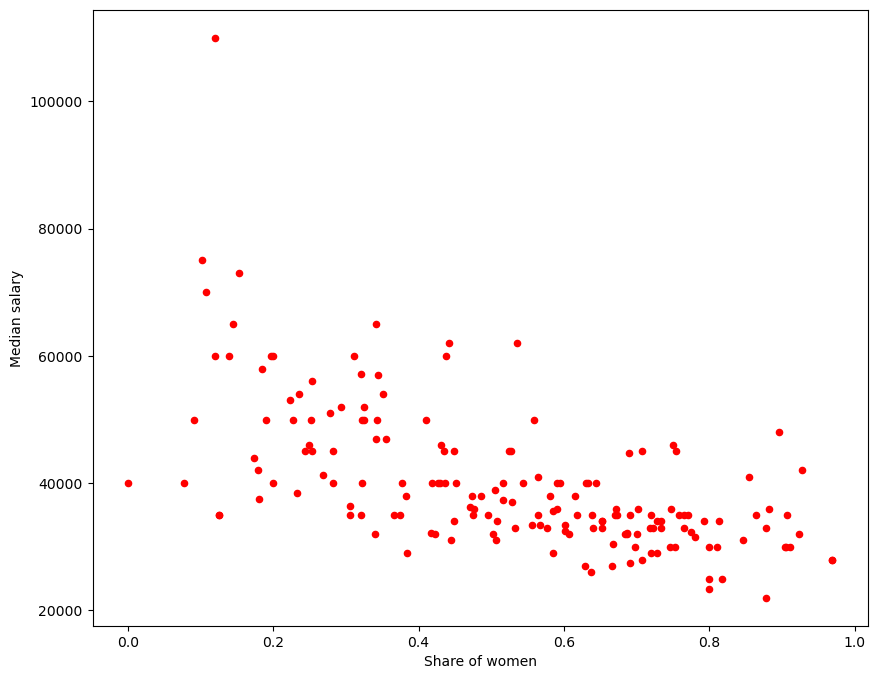

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot(x='ShareWomen', y='Median', kind='scatter', figsize=(10, 8), color='red')
plt.xlabel('Share of women')
plt.ylabel('Median salary')
# add a linear regression line to the plot

Median        0
ShareWomen    1
dtype: int64


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

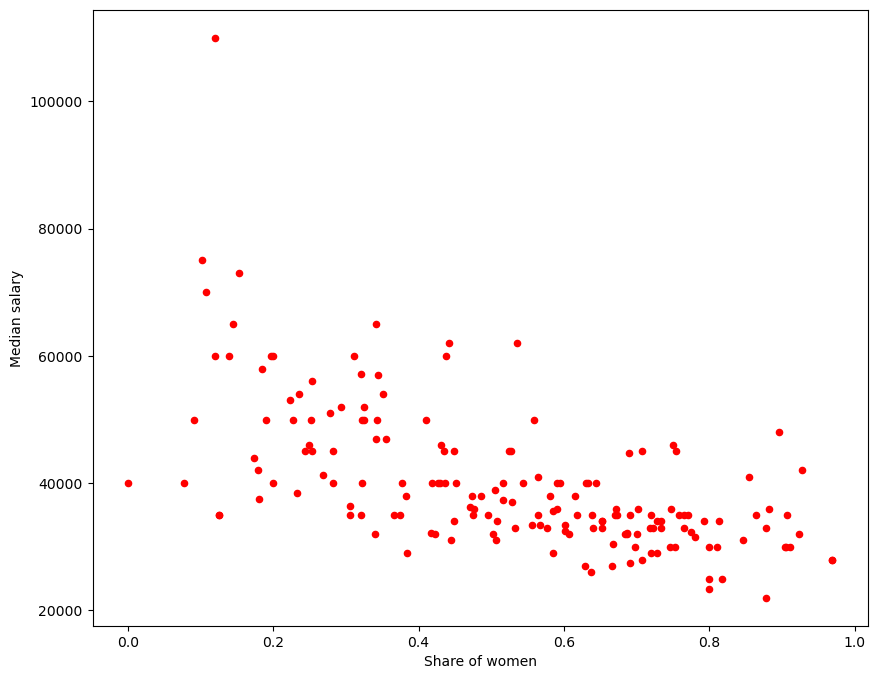

In [14]:
print(data[['Median','ShareWomen']].isnull().sum()) # check if there are NaNs in the data!
data1 = data[['Median','ShareWomen']].dropna()  # drop NaNs
data1.plot(x='ShareWomen', y='Median', kind='scatter', figsize=(10, 8), color='red')
plt.xlabel('Share of women')
plt.ylabel('Median salary')
# add a linear regression line to the plot
b,_ = ols(X=data['ShareWomen'],y=data['Median'],verbose=False)
fn = lambda x: b[0]+b[1]*x
xx = np.linspace(0,1,100)
plt.plot(xx,fn(xx),color='navy',linewidth=3)
plt.show()

In [15]:
# create fraction variables
data.drop(index=data[data['Total']==0].index,inplace=True)  # drop zero Totals
data.drop(index=data[data['Employed']==0].index,inplace=True)  # drop zero Employed
data['Employment rate'] = data['Employed'] / data['Total']
data['Fulltime rate'] = data['Full_time'] / data['Employed']
data2 = data[['Median','ShareWomen','Employment rate','Fulltime rate']].dropna()  # drop NaNs
y = data2['Median']/1000  # rescale salary

In [16]:
# run the full model
ols(data2[['ShareWomen','Employment rate','Fulltime rate']],y);

ValueError: matrices are not aligned

#### Further learning resources

- Regression analysis using `sklearn` library
  [https://datascience.quantecon.org/applications/regression.html](https://datascience.quantecon.org/applications/regression.html)  